In [25]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as sts
import pandas as pd 
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Problem 3

In [2]:
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
# 2009 quarterly seasonally adjusted data, billions of chained dollars
GDP = web.DataReader("GDPC1", "fred", start, end) #real GDP
PC = web.DataReader("PCECC96", "fred", start, end) #real personal consumption
IN = web.DataReader("GPDIC1", "fred", start, end) #real gross private domestic investment
GDPD = web.DataReader("GDPDEF", "fred", start, end) #implicit price deflator

# convert to quarterly frequencies by averaging over the three months in the quarter
GDP = GDP.resample('3M').mean()
PC = PC.resample('3M').mean()
IN = IN.resample('3M').mean()
GDPD = GDPD.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logGDP = np.log(GDP.values)
logPC = np.log(PC.values)
logIN = np.log(IN.values)
logGDPD = np.log(GDPD.values)

# take periodograms to plot spectral density estimates
GDPfreq, GDPper = sig.periodogram(logGDP, axis=0)
PCfreq, PCper = sig.periodogram(logPC, axis=0)
INfreq, INper = sig.periodogram(logIN, axis=0)
GDPDfreq, GDPDper = sig.periodogram(logGDPD, axis=0)

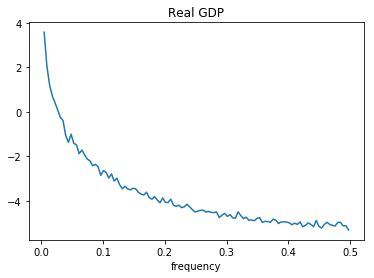

In [3]:
plt.plot(GDPfreq[1:], np.log(GDPper[1:]))
plt.title('Real GDP')
plt.xlabel('frequency')
plt.savefig('Real_GDP_Periodogram')
plt.show()

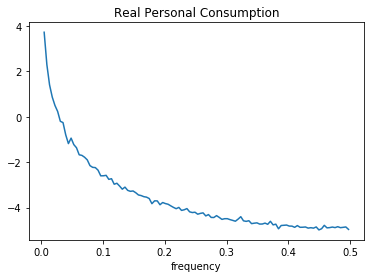

In [4]:
plt.plot(PCfreq[1:], np.log(PCper[1:]))
plt.title('Real Personal Consumption')
plt.xlabel('frequency')
plt.savefig('Real_PC_Periodogram')
plt.show()

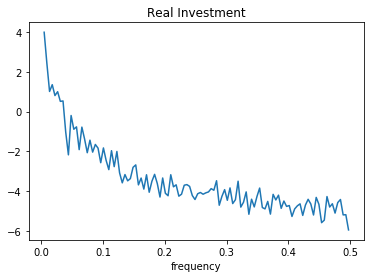

In [5]:
plt.plot(INfreq[1:], np.log(INper[1:]))
plt.title('Real Investment')
plt.xlabel('frequency')
plt.savefig('Real_IN_Periodogram')
plt.show()

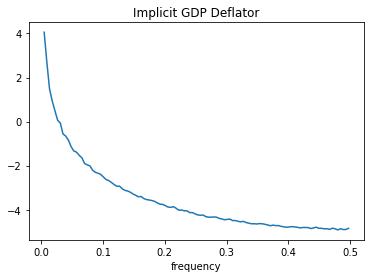

In [6]:
plt.plot(GDPDfreq[1:], np.log(GDPDper[1:]))
plt.title('Implicit GDP Deflator')
plt.xlabel('frequency')
plt.savefig('Real_GDPD_Periodogram')
plt.show()

# Problem 4

In [7]:
# Take the HP filter for lambda=1600
GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, 1600)
PCcy, PCtr = sm.tsa.filters.hpfilter(logPC, 1600)
INcy, INtr = sm.tsa.filters.hpfilter(logIN, 1600)
GDPDcy, GDPDtr = sm.tsa.filters.hpfilter(logGDPD, 1600)

# Recalculate periodogram on filtered cyclical components
GDPfreq, GDPcyper = sig.periodogram(GDPcy, axis=0)
PCfreq, PCcyper = sig.periodogram(PCcy, axis=0)
INfreq, INcyper = sig.periodogram(INcy, axis=0)
GDPDfreq, GDPDcyper = sig.periodogram(GDPDcy, axis=0)

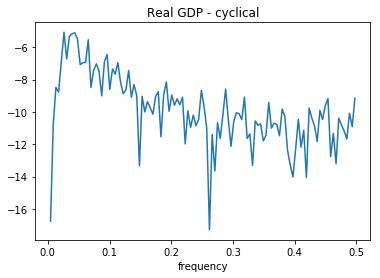

In [8]:
plt.plot(GDPfreq[1:], np.log(GDPcyper[1:]))
plt.title('Real GDP - cyclical')
plt.xlabel('frequency')
plt.savefig('Real_GDP_Cyclical')
plt.show()

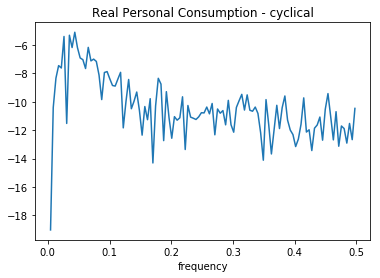

In [9]:
plt.plot(PCfreq[1:], np.log(PCcyper[1:]))
plt.title('Real Personal Consumption - cyclical')
plt.xlabel('frequency')
plt.savefig('Real_PC_Cyclical')
plt.show()

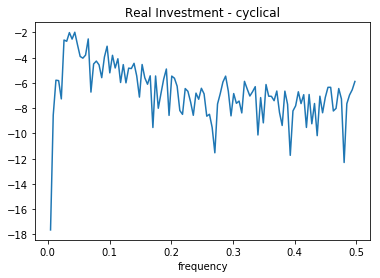

In [10]:
plt.plot(INfreq[1:], np.log(INcyper[1:]))
plt.title('Real Investment - cyclical')
plt.xlabel('frequency')
plt.savefig('Real_IN_Cyclical')
plt.show()

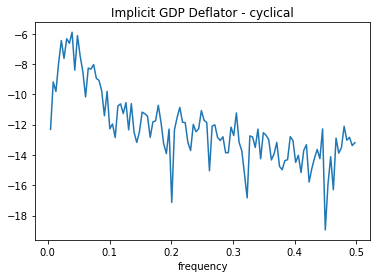

In [11]:
plt.plot(GDPDfreq[1:], np.log(GDPDcyper[1:]))
plt.title('Implicit GDP Deflator - cyclical')
plt.xlabel('frequency')
plt.savefig('Real_GDPD_Cyclical')
plt.show()

In [12]:
# Recalculate periodogram on filtered trend components
GDPfreq, GDPtrper = sig.periodogram(GDPtr, axis=0)
PCfreq, PCtrper = sig.periodogram(PCtr, axis=0)
INfreq, INtrper = sig.periodogram(INtr, axis=0)
GDPDfreq, GDPDtrper = sig.periodogram(GDPDtr, axis=0)

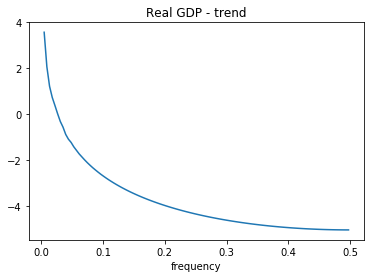

In [13]:
plt.plot(GDPfreq[1:], np.log(GDPtrper[1:]))
plt.title('Real GDP - trend')
plt.xlabel('frequency')
plt.savefig('Real_GDP_Trend')
plt.show()

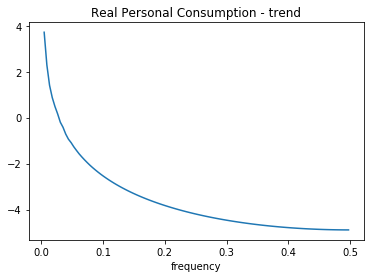

In [14]:
plt.plot(PCfreq[1:], np.log(PCtrper[1:]))
plt.title('Real Personal Consumption - trend')
plt.xlabel('frequency')
plt.savefig('Real_PC_Trend')
plt.show()

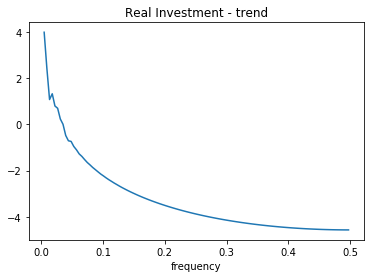

In [15]:
plt.plot(INfreq[1:], np.log(INtrper[1:]))
plt.title('Real Investment - trend')
plt.xlabel('frequency')
plt.savefig('Real_IN_Trend')
plt.show()

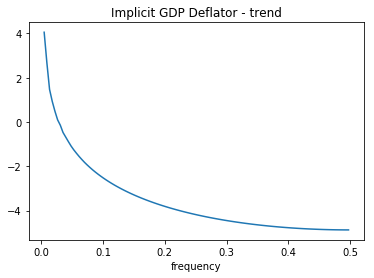

In [16]:
plt.plot(GDPDfreq[1:], np.log(GDPDtrper[1:]))
plt.title('Implicit GDP Deflator - trend')
plt.xlabel('frequency')
plt.savefig('Real_GDPD_Trend')
plt.show()

# Problem 5

Standard Deviations:
GDP: 0.498499481639 PC: 0.539469570373 IN: 0.613788886896 GDPD: 0.620622264344
Autocorrelation:
GDP: 0.999978012312 PC: 0.999983565373 IN: 0.999772210808 GDPD: 0.999969094805
Correlation with GDP:
GDP: 0.999851505866 PC: 0.999495974839 IN: 0.993711894742 GDPD: 0.979046052297


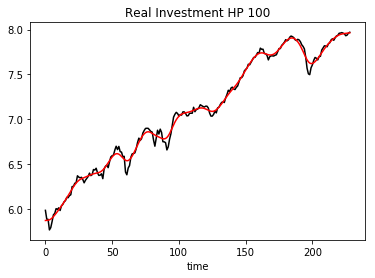

Standard Deviations:
GDP: 0.498407693412 PC: 0.539403128398 IN: 0.612492167051 GDPD: 0.620577743463
Autocorrelation:
GDP: 0.99998687643 PC: 0.999989130307 IN: 0.999882200658 GDPD: 0.99997103281
Correlation with GDP:
GDP: 0.999734123524 PC: 0.999397938861 IN: 0.994874438067 GDPD: 0.979201757314


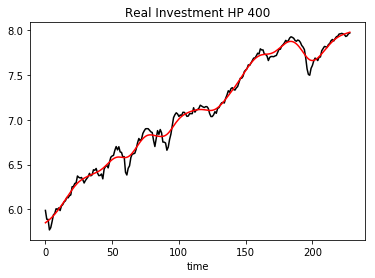

Standard Deviations:
GDP: 0.498302903253 PC: 0.539311402016 IN: 0.611305115548 GDPD: 0.620475406785
Autocorrelation:
GDP: 0.999992278774 PC: 0.999992949441 IN: 0.999940864236 GDPD: 0.999973003722
Correlation with GDP:
GDP: 0.999567556004 PC: 0.999274286236 IN: 0.995781551059 GDPD: 0.979501574727


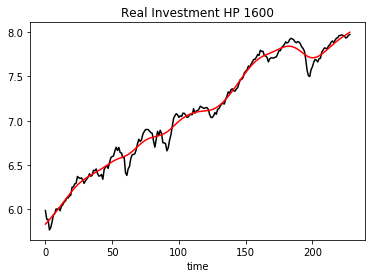

Standard Deviations:
GDP: 0.498175496037 PC: 0.539178022751 IN: 0.6100386832 GDPD: 0.620198038452
Autocorrelation:
GDP: 0.999995173048 PC: 0.999995589769 IN: 0.999967602143 GDPD: 0.999975833531
Correlation with GDP:
GDP: 0.99937909965 PC: 0.999141919842 IN: 0.9968206439 GDPD: 0.980188636045


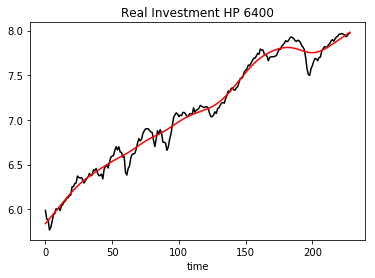

Standard Deviations:
GDP: 0.497978066579 PC: 0.538983934768 IN: 0.608529581586 GDPD: 0.619448844724
Autocorrelation:
GDP: 0.999996968871 PC: 0.999997293567 IN: 0.999985397139 GDPD: 0.999981142304
Correlation with GDP:
GDP: 0.999168191909 PC: 0.998961009983 IN: 0.998049567025 GDPD: 0.981891195841


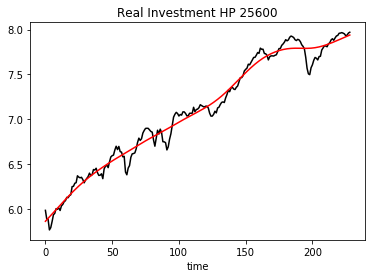

In [35]:
lambdas = np.array([100,400,1600,6400,25600])

for factor in lambdas:
    # Take the HP filter for lambda=1600
    GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, factor)
    PCcy, PCtr = sm.tsa.filters.hpfilter(logPC, factor)
    INcy, INtr = sm.tsa.filters.hpfilter(logIN, factor)
    GDPDcy, GDPDtr = sm.tsa.filters.hpfilter(logGDPD, factor)
    
    GDPtr = np.array(GDPtr)
    PCtr = np.array(PCtr)
    INtr = np.array(INtr)
    GDPDtr = np.array(GDPDtr)
    
    # Standard deviation
    GDPsd = np.std(GDPtr)
    PCsd = np.std(PCtr)
    INsd = np.std(INtr)
    GDPDsd = np.std(GDPDtr)
    
    print('Standard Deviations:')
    print('GDP:', GDPsd, 'PC:', PCsd, 'IN:', INsd, 'GDPD:', GDPDsd)
    
    # Autocorrelation
    GDPac = sts.pearsonr(GDPtr[:-1],GDPtr[1:])[0]
    PCac = sts.pearsonr(PCtr[:-1],PCtr[1:])[0]
    INac = sts.pearsonr(INtr[:-1],INtr[1:])[0]
    GDPDac = sts.pearsonr(GDPDtr[:-1],GDPDtr[1:])[0]
    
    print('Autocorrelation:')
    print('GDP:', GDPac, 'PC:', PCac, 'IN:', INac, 'GDPD:', GDPDac)
    
    logGDP = logGDP.flatten()
    # Correlation with GDP
    GDPcorr = sts.pearsonr(GDPtr,logGDP)[0]
    PCcorr = sts.pearsonr(PCtr,logGDP)[0]
    INcorr = sts.pearsonr(INtr,logGDP)[0]
    GDPDcorr = sts.pearsonr(GDPDtr,logGDP)[0]
    
    print('Correlation with GDP:')
    print('GDP:', GDPcorr, 'PC:', PCcorr, 'IN:', INcorr, 'GDPD:', GDPDcorr)
    
    # Plot investment
    plt.plot(range(INtr.size), logIN, 'k-')
    plt.plot(range(INtr.size), INtr, 'r-')
    plt.title('Real Investment HP '+str(factor))
    plt.xlabel('time')
    plt.savefig('Real_IN_HP'+str(factor))
    plt.show()